# Sudoku with Mnist dataset #

### 1. Import mudules & preprocessing###

In [34]:
from Generator import *
import sudoku, mnist4, datetime
import numpy as np
import matplotlib.pyplot as plt

numpy, datetime, and matplotlib were already prepared in python. 

But sudoku, mnist4, and Generator have to be prepared.  

In [35]:
start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S') 
print(start_time)

# get number image from MNIST dataset
test_images = mnist4.test_images()
test_labels = mnist4.test_labels()

2020_05_27_14_36_50


start_time can be used as a unique ID.

In [36]:
test_labels[0]

7

Show first MNIST label

In [37]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Show first MNIST image

### 2. Prepare Functions ###

#### 2.1 Get mnist image from number ####

In [38]:
def get_mnist(num, background=240):       # background can be changed 240 is light gray color
  images = np.where(test_labels==num)[0]
  image = np.random.choice(images, 1)
  reshaped_img = test_images[image].reshape((28, 28)).astype(np.int)
  reshaped_img = background - reshaped_img                         
  return reshaped_img

In get_mnist function, 

First, check the MNIST label indexes which are the same number with specified num.

Second, choose randomly one index among the same number. 

Third, reshape the MNIST image.

Fourth, change background because sudoku needs a white background.

#### 2.2 Put MNIST images to the white board ####

In [39]:
def board(s):
  board_img = np.empty((28*9, 28*9))   # 252*252
  board_img.fill(255)

  for i in range(9):
    for j in range(9):
      num = s[9 * i + j] 
      
      if num is not None:                         
        num_img = get_mnist(num)             
        rows = slice(28*i, 28*(i+1))              # for example, i = j = 1, then rows = slice(28:56)
        cols = slice(28*j, 28*(j+1))              #                              cols = slice(28:56)
        board_img[rows, cols] = num_img          

  return board_img                                



First, sudoku needs 81 (9,9) sections. But MNIST image size is 28*28. 

So, 252 * 252 (28 * 9,28 * 9) empty white board is prepared. 

Second, for 81 sudoku sections, if some section is not empty, 

find MNIST image with the previous function and allocate it to white board one section (28*28).

#### 2.3 Make the board more clearly ####

In [40]:
def cus_grid(board_imgs):
  for key, img in board_imgs.items():
    fig = plt.figure(figsize=(5, 5), dpi=100)
    ax = fig.add_subplot(111)    

    major_grid = np.arange(0, 28*9, 28*3)        # 28*3 is unit
    minor_grid = np.arange(0, 28*9, 28)          # 28   is unit
    ax.set_xticks(major_grid)                    # put thick grid to figure
    ax.set_xticks(minor_grid, minor=True)        # put slim grid to figure but thick grid will cover slim grid
    ax.set_yticks(major_grid)
    ax.set_yticks(minor_grid, minor=True)

    
    ax.grid(True, which='both', color='k', linestyle='solid')   # for both major and minor, color=k and line style is solid
                                                                # - solid, -- dashed, -. dashdot, : dotted, None nothing
    ax.grid(which='major', alpha=0.6, linewidth=1.5)            # Determine major line width and alpha
    ax.grid(which='minor', alpha=0.2)

    plt.xlim(0, 28*9) 
    plt.ylim(28*9, 0)
    ax.axes.xaxis.set_ticklabels([])                        # remove x axis labels
    ax.axes.yaxis.set_ticklabels([])                        # remove y axis labels
    
    plt.imshow(img)
    plt.gray()
    plt.savefig('%s_%s.png' % (key, start_time))            # key have two categories: quiz and answer
    
  plt.show()

After replacing numbers with MNIST images, there's no grid. 
So, in this step, the grid will be added.

First, define a Major grid, minor grid, and put grid to figure. 
the Major grid will package big 9 boxes and the minor grid divide every number.

Second, customize the grid.

Third, Remove x,y axis because this is sudoku, not a graph

Fourth, save the figure in the computer with a unique file name(based on start time)

### 3. Generate sudoku ###

In [41]:
gen = Generator()
quiz, answer = gen.generate(3)      # Define game level (0,1,2,3)
quiz = gen.get(quiz)
answer = gen.get(answer)

Runtime is 13.257691621780396 seconds
Guesses: 8
Level: 3
[9, None, None] [8, None, None] [None, 6, None]
[None, None, None] [9, 6, None] [5, None, None]
[None, 2, None] [None, None, None] [None, 7, None]

[8, 4, None] [None, None, None] [6, None, 2]
[None, None, None] [None, 9, 2] [8, 3, 5]
[None, None, None] [None, None, 6] [None, None, None]

[5, None, None] [2, 7, None] [None, 8, 3]
[None, 8, None] [None, None, None] [None, None, 9]
[None, 9, 3] [None, 5, 8] [None, None, 6]


With generator, sudoku is made with "Game level"

After generating sudoku, unpack quiz and answer

### 4. Change generated sudoku as MNIST version ###

In [42]:
quiz_image = board(quiz)
answer_image = board(answer)

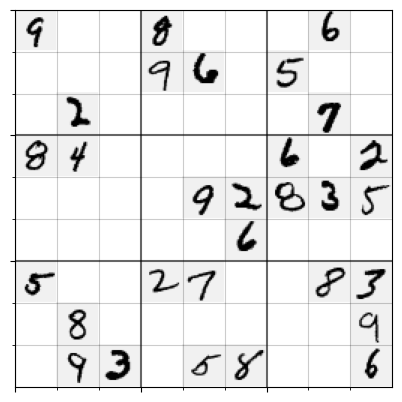

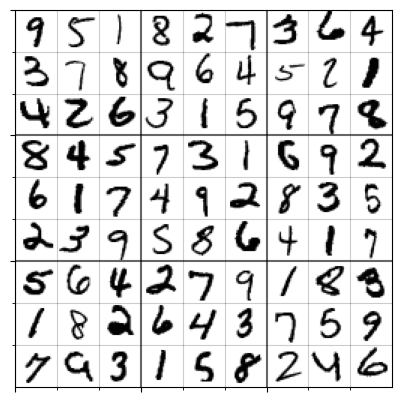

In [43]:
cus_grid({
  'quiz': quiz_image,
  'answer': answer_image
})